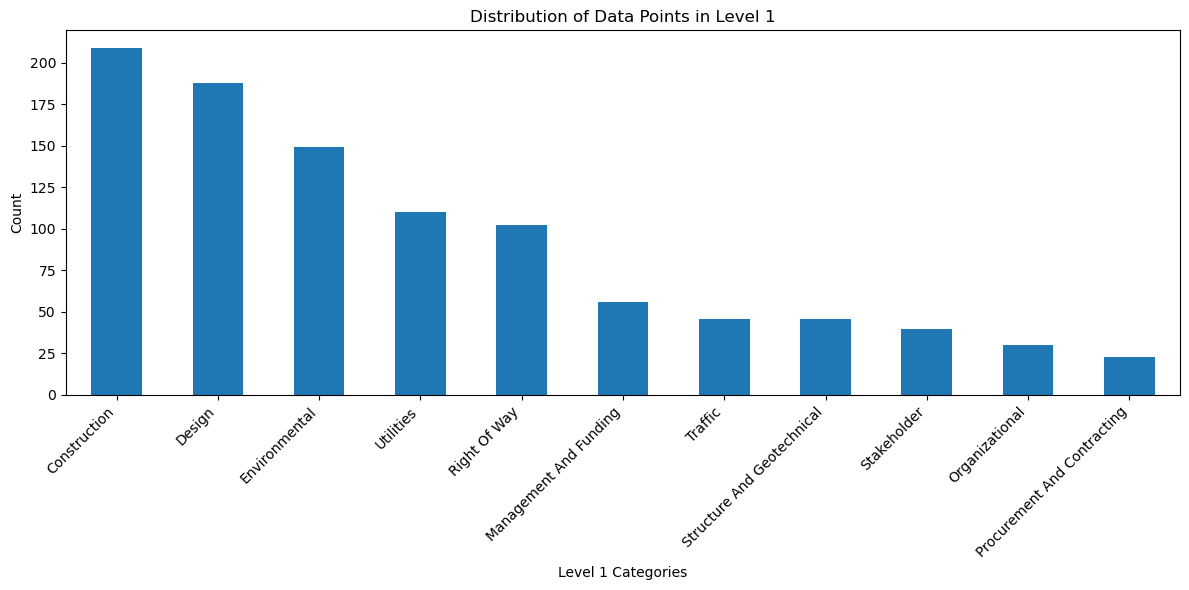

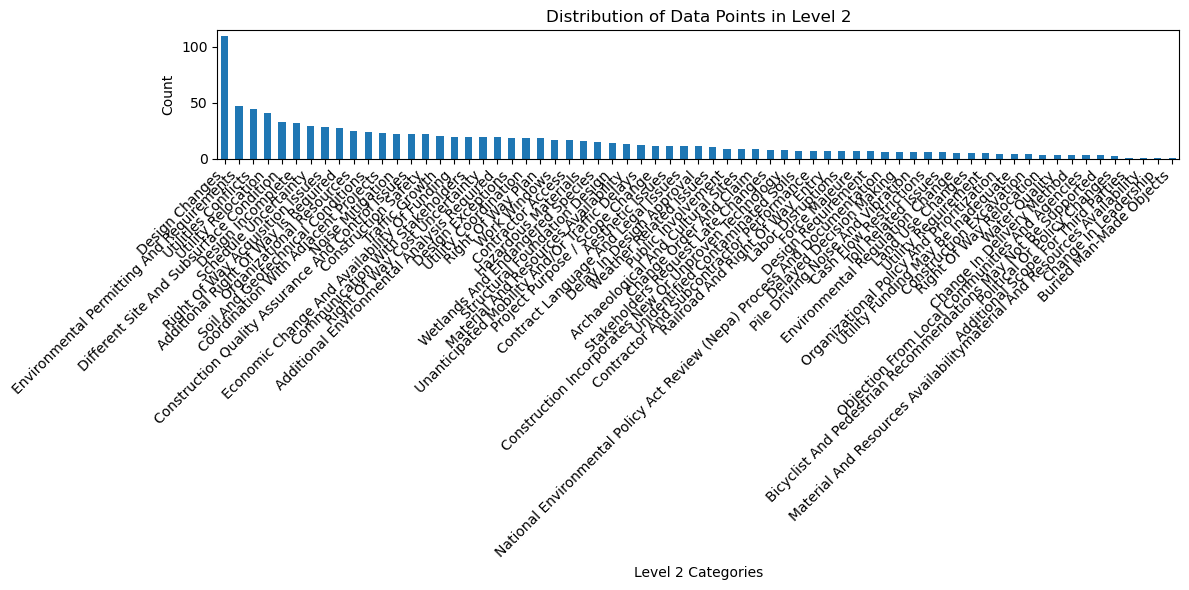

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load the Excel file
file_path = 'Risk_Database1.xlsx'  # Adjust path if needed
df = pd.read_excel(file_path)

# Drop rows where Level 1 or Level 2 is empty or NaN
df_clean = df.dropna(subset=['Level1', 'Level 2'])
# Clean and standardize text
df_clean['Level1'] = df_clean['Level1'].str.strip().str.title()
df_clean['Level 2'] = df_clean['Level 2'].str.strip().str.title()

# Plot bar chart for Level 1
plt.figure(figsize=(12, 6))
df_clean['Level1'].value_counts().plot(kind='bar')
plt.title('Distribution of Data Points in Level 1')
plt.xlabel('Level 1 Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot bar chart for Level 2
plt.figure(figsize=(12, 6))
df_clean['Level 2'].value_counts().plot(kind='bar')
plt.title('Distribution of Data Points in Level 2')
plt.xlabel('Level 2 Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [2]:
# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_clean['Level1_encoded'] = le.fit_transform(df_clean['Level1'])

# 📋 Fixed Level 1 Categories
level1_categories = [
    "Construction", "Design", "Environmental", "Utilities", "Right Of Way",
    "Management And Funding", "Traffic", "Stakeholder", "Organizational",
    "Procurement And Contracting", "Structure And Geotechnical"
]

In [3]:
df_clean

,ver,proj_id,proj_name,sgmnt,state,risk_code,risk_name,risk_desc,Level1,Level 2,Level1_encoded
0,Initial,NaN,Goethals Bridge Replacement,NaN,NY,NaN,Labor or material shortage,Labor resources become unavailable. Material ...,Construction,Material And Resources Availability,0
1,Initial,NaN,Goethals Bridge Replacement,NaN,NY,NaN,Early start of construction,The Developer starts construction before PA ha...,Construction,Schedule Uncertainty,0
2,Initial,NaN,Goethals Bridge Replacement,NaN,NY,NaN,Unsafe Working Practices,The Developer seen to be conducting unsafe wor...,Construction,Construction Safety,0
3,Initial,NaN,Goethals Bridge Replacement,NaN,NY,NaN,Failure to Report Known Defect,Failure by the Developer to report and act on ...,Construction,Construction Quality Assurance And Control Issues,0
4,Initial,NaN,Goethals Bridge Replacement,NaN,NY,NaN,Failure to perform qualtiy assurance and quali...,Failure by the Developer to follow a requireme...,Construction,Construction Quality Assurance And Control Issues,0
...,...,...,...,...,...,...,...,...,...,...,...
994,Initial,NaN,SR 202L South Mountain Freeway Project,NaN,AZ,DES-50-3,ITS / Advanced Traffic Management,"There could be additional ITS costs required, ...",Traffic,Traffic Growth,9
995,Initial,NaN,SR 202L South Mountain Freeway Project,NaN,AZ,DES-10-4,Opportunity to Reduce Shoulders Width,Base assumes 12 ft. of shoulder width - Standa...,Design,Design Changes,1
996,Initial,NaN,SR 202L South Mountain Freeway Project,NaN,AZ,DES-10-4,Opportunity to Reduce Shoulders Width,Base assumes 12 ft. of shoulder width - Standa...,Design,Design Changes,1
997,Initial,NaN,SR 202L South Mountain Freeway Project,NaN,AZ,ENV-60-1,Unknown environmental mitigation plan and costs,It is unknown if any more mitigation would be ...,Environmental,Additional Environmental Analysis Required,2


In [4]:
from sklearn.model_selection import train_test_split

X = df_clean['risk_name']
y = df_clean['Level1_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Try multiple models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred, target_names=le.classes_))



--- Logistic Regression ---
                             precision    recall  f1-score   support

               Construction       0.58      0.95      0.72        42
                     Design       0.71      0.95      0.81        38
              Environmental       0.97      0.93      0.95        30
     Management And Funding       1.00      0.27      0.43        11
             Organizational       1.00      0.17      0.29         6
Procurement And Contracting       0.00      0.00      0.00         5
               Right Of Way       0.95      0.95      0.95        20
                Stakeholder       1.00      0.12      0.22         8
 Structure And Geotechnical       1.00      0.11      0.20         9
                    Traffic       1.00      0.44      0.62         9
                  Utilities       1.00      0.95      0.98        22

                   accuracy                           0.77       200
                  macro avg       0.84      0.53      0.56       200
   

/Users/aerfani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/aerfani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/aerfani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape


--- Random Forest ---
                             precision    recall  f1-score   support

               Construction       0.63      0.98      0.77        42
                     Design       0.89      0.89      0.89        38
              Environmental       1.00      0.90      0.95        30
     Management And Funding       1.00      0.45      0.62        11
             Organizational       1.00      0.50      0.67         6
Procurement And Contracting       1.00      0.20      0.33         5
               Right Of Way       1.00      0.90      0.95        20
                Stakeholder       0.83      0.62      0.71         8
 Structure And Geotechnical       0.71      0.56      0.62         9
                    Traffic       0.89      0.89      0.89         9
                  Utilities       0.95      0.91      0.93        22

                   accuracy                           0.83       200
                  macro avg       0.90      0.71      0.76       200
         

In [6]:
import gensim.downloader as api
from tqdm import tqdm
import numpy as np

# Load Word2Vec
w2v_model = api.load("word2vec-google-news-300")  # ~1.5GB, loads once


In [7]:
# Function to average word vectors in a sentence
def get_avg_vector(text):
    words = text.split()
    vectors = [w2v_model[word] for word in words if word in w2v_model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(300)


In [8]:
X_train_w2v = np.vstack([get_avg_vector(text) for text in tqdm(X_train)])
X_test_w2v = np.vstack([get_avg_vector(text) for text in tqdm(X_test)])


100%|██████████████████████████████████████| 200/200 [00:00<00:00, 68383.53it/s]


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_w2v, y_train)
    y_pred = model.predict(X_test_w2v)
    print(f"\n--- {name} (Word2Vec) ---")
    print(classification_report(y_test, y_pred, target_names=le.classes_))



--- Logistic Regression (Word2Vec) ---
                             precision    recall  f1-score   support

               Construction       0.71      0.95      0.82        42
                     Design       0.84      0.97      0.90        38
              Environmental       0.96      0.80      0.87        30
     Management And Funding       0.57      0.36      0.44        11
             Organizational       0.62      0.83      0.71         6
Procurement And Contracting       1.00      0.60      0.75         5
               Right Of Way       0.90      0.95      0.93        20
                Stakeholder       1.00      0.62      0.77         8
 Structure And Geotechnical       1.00      0.33      0.50         9
                    Traffic       1.00      0.89      0.94         9
                  Utilities       0.95      0.86      0.90        22

                   accuracy                           0.83       200
                  macro avg       0.87      0.74      0.78   

/Users/aerfani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/aerfani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/aerfani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

In [10]:
from sentence_transformers import SentenceTransformer

# Load a lightweight and effective model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')  # 384-dim embedding, very fast


In [11]:
# Convert text into dense vectors
X_train_bert = bert_model.encode(X_train.tolist(), convert_to_numpy=True, show_progress_bar=True)
X_test_bert = bert_model.encode(X_test.tolist(), convert_to_numpy=True, show_progress_bar=True)


Batches:   0%|          | 0/25 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_bert, y_train)
    y_pred = model.predict(X_test_bert)
    print(f"\n--- {name} (BERT Sentence Embeddings) ---")
    print(classification_report(y_test, y_pred, target_names=le.classes_))



--- Logistic Regression (BERT Sentence Embeddings) ---
                             precision    recall  f1-score   support

               Construction       0.74      0.88      0.80        42
                     Design       0.74      0.97      0.84        38
              Environmental       0.97      0.97      0.97        30
     Management And Funding       0.78      0.64      0.70        11
             Organizational       1.00      0.50      0.67         6
Procurement And Contracting       0.00      0.00      0.00         5
               Right Of Way       0.94      0.80      0.86        20
                Stakeholder       1.00      0.50      0.67         8
 Structure And Geotechnical       0.80      0.44      0.57         9
                    Traffic       1.00      0.78      0.88         9
                  Utilities       0.84      0.95      0.89        22

                   accuracy                           0.82       200
                  macro avg       0.80      0

/Users/aerfani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/aerfani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/aerfani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape


--- Random Forest (BERT Sentence Embeddings) ---
                             precision    recall  f1-score   support

               Construction       0.66      0.88      0.76        42
                     Design       0.76      0.97      0.85        38
              Environmental       0.94      0.97      0.95        30
     Management And Funding       1.00      0.36      0.53        11
             Organizational       1.00      0.50      0.67         6
Procurement And Contracting       1.00      0.20      0.33         5
               Right Of Way       0.88      0.75      0.81        20
                Stakeholder       1.00      0.25      0.40         8
 Structure And Geotechnical       1.00      0.33      0.50         9
                    Traffic       0.88      0.78      0.82         9
                  Utilities       0.81      0.95      0.88        22

                   accuracy                           0.80       200
                  macro avg       0.90      0.63   

In [13]:
X = df_clean['risk_desc']
y = df_clean['Level1_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Try multiple models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred, target_names=le.classes_))


--- Logistic Regression ---
                             precision    recall  f1-score   support

               Construction       0.47      0.88      0.61        42
                     Design       0.53      0.79      0.63        38
              Environmental       1.00      0.70      0.82        30
     Management And Funding       0.60      0.27      0.38        11
             Organizational       1.00      0.33      0.50         6
Procurement And Contracting       0.00      0.00      0.00         5
               Right Of Way       1.00      0.70      0.82        20
                Stakeholder       1.00      0.12      0.22         8
 Structure And Geotechnical       0.00      0.00      0.00         9
                    Traffic       1.00      0.11      0.20         9
                  Utilities       0.89      0.73      0.80        22

                   accuracy                           0.62       200
                  macro avg       0.68      0.42      0.45       200
   

/Users/aerfani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/aerfani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/aerfani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape


--- Random Forest ---
                             precision    recall  f1-score   support

               Construction       0.55      0.83      0.66        42
                     Design       0.64      0.79      0.71        38
              Environmental       0.84      0.70      0.76        30
     Management And Funding       0.75      0.27      0.40        11
             Organizational       0.75      0.50      0.60         6
Procurement And Contracting       0.12      0.20      0.15         5
               Right Of Way       1.00      0.75      0.86        20
                Stakeholder       1.00      0.12      0.22         8
 Structure And Geotechnical       0.25      0.11      0.15         9
                    Traffic       0.75      0.33      0.46         9
                  Utilities       0.71      0.77      0.74        22

                   accuracy                           0.65       200
                  macro avg       0.67      0.49      0.52       200
         

In [14]:
# 📦 Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from openai import OpenAI

# 🔑 Set your GPT-4 API Key
client = OpenAI(api_key="**"
)  # ← Replace with your actual key

# 📥 Load & Clean the Dataset
df = pd.read_excel("Risk_Database1.xlsx")
df = df.dropna(subset=['risk_name', 'Level1'])

df['risk_name'] = df['risk_name'].str.strip().str.lower()
df['Level1'] = df['Level1'].str.strip().str.title()

# 🎯 Optional: Encode Labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Level1_encoded'] = le.fit_transform(df['Level1'])

# 🔀 Split Data for Testing
X_train, X_test, y_train, y_test = train_test_split(
    df['risk_name'], df['Level1'], test_size=0.2, random_state=42, stratify=df['Level1']
)

# 📋 Define Fixed List of Categories
level1_categories = [
    "Construction", "Design", "Environmental", "Utilities", "Right Of Way",
    "Management And Funding", "Traffic", "Stakeholder", "Organizational",
    "Procurement And Contracting", "Structure And Geotechnical"
]

# ✏️ Build GPT Prompt
def build_prompt(risk_name):
    prompt = f"""
You are a risk management expert. Given the name of a construction project risk, assign it to the most appropriate high-level category from the list below.

Return only one category name from this list:
- Construction
- Design
- Environmental
- Utilities
- Right Of Way
- Management And Funding
- Traffic
- Stakeholder
- Organizational
- Procurement And Contracting
- Structure And Geotechnical

Risk Name: "{risk_name}"
Category:"""
    return prompt.strip()

# 🤖 Classify Risk with GPT-4
def classify_risk_gpt4(risk_name):
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": build_prompt(risk_name)}],
            temperature=0,
            max_tokens=20,
        )
        return response.choices[0].message.content.strip().title()
    except Exception as e:
        print(f"Error: {e}")
        return "Unknown"

# 🧪 Run Predictions on Test Set (with progress bar)
preds = [classify_risk_gpt4(rn) for rn in tqdm(X_test.tolist())]

# 📊 Evaluate Model
print("\n--- GPT-4 Zero-Shot Performance ---")
print(classification_report(y_test, preds, labels=level1_categories))


100%|█████████████████████████████████████████| 200/200 [02:32<00:00,  1.31it/s]


--- GPT-4 Zero-Shot Performance ---
                             precision    recall  f1-score   support

               Construction       0.83      0.48      0.61        42
                     Design       0.85      0.87      0.86        38
              Environmental       0.90      0.93      0.92        30
                  Utilities       0.92      1.00      0.96        22
               Right Of Way       1.00      1.00      1.00        20
     Management And Funding       0.47      0.73      0.57        11
                    Traffic       0.73      0.89      0.80         9
                Stakeholder       1.00      0.62      0.77         8
             Organizational       0.60      0.50      0.55         6
Procurement And Contracting       0.25      0.60      0.35         5
 Structure And Geotechnical       0.67      0.89      0.76         9

                   accuracy                           0.79       200
                  macro avg       0.75      0.77      0.74      

In [15]:
# 📦 Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from openai import OpenAI

# 🔑 Set your GPT-4 API Key
client = OpenAI(api_key="**"
)  # ← Replace with your actual key

# 📥 Load & Clean the Dataset
df = pd.read_excel("Risk_Database1.xlsx")
df = df.dropna(subset=['risk_name', 'Level1'])

df['risk_name'] = df['risk_name'].str.strip().str.lower()
df['Level1'] = df['Level1'].str.strip().str.title()

# 🎯 Encode Labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Level1_encoded'] = le.fit_transform(df['Level1'])

# 🔀 Split for Testing
X_train, X_test, y_train, y_test = train_test_split(
    df['risk_name'], df['Level1'], test_size=0.2, random_state=42, stratify=df['Level1']
)

# 📋 Fixed Level 1 Categories
level1_categories = [
    "Construction", "Design", "Environmental", "Utilities", "Right Of Way",
    "Management And Funding", "Traffic", "Stakeholder", "Organizational",
    "Procurement And Contracting", "Structure And Geotechnical"
]

# ✏️ Few-Shot Prompt Template
def build_few_shot_prompt(risk_name):
    prompt = f"""
You are a risk management expert. Given the name of a construction project risk, assign it to the most appropriate high-level category. Use the following examples to guide your reasoning:

Examples:

Risk Name: "labor or material shortage"
Category: Construction

Risk Name: "changes to structural elements design required"
Category: Design

Risk Name: "construction environmental noise constraints"
Category: Environmental

Risk Name: "utility phasing"
Category: Utilities

Risk Name: "additional right of way is required"
Category: Right Of Way

Risk Name: "political and union impacts on construction"
Category: Management And Funding

Risk Name: "traffic management"
Category: Traffic

Risk Name: "failure to get agreement with stakeholder"
Category: Stakeholder

Risk Name: "ongoing involvement of owner staff"
Category: Organizational

Risk Name: "construction acceleration thru design build process"
Category: Procurement And Contracting

Risk Name: "rock excavation"
Category: Structure And Geotechnical

Now, classify the following risk:

Risk Name: "{risk_name}"
Category:"""
    return prompt.strip()

# 🤖 GPT-4 Classification with Few-Shot Prompting
def classify_risk_gpt4_few_shot(risk_name):
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": build_few_shot_prompt(risk_name)}],
            temperature=0,
            max_tokens=20,
        )
        return response.choices[0].message.content.strip().title()
    except Exception as e:
        print(f"Error: {e}")
        return "Unknown"

# 🔁 Classify All Test Entries
preds = [classify_risk_gpt4_few_shot(rn) for rn in tqdm(X_test.tolist())]

# 📊 Evaluate Results
print("\n--- GPT-4 Few-Shot Performance ---")
print(classification_report(y_test, preds, labels=level1_categories))


100%|█████████████████████████████████████████| 200/200 [02:28<00:00,  1.35it/s]


--- GPT-4 Few-Shot Performance ---
                             precision    recall  f1-score   support

               Construction       0.94      0.40      0.57        42
                     Design       0.78      0.84      0.81        38
              Environmental       0.87      0.90      0.89        30
                  Utilities       0.91      0.95      0.93        22
               Right Of Way       1.00      0.95      0.97        20
     Management And Funding       0.47      0.73      0.57        11
                    Traffic       0.67      0.89      0.76         9
                Stakeholder       0.80      0.50      0.62         8
             Organizational       1.00      0.83      0.91         6
Procurement And Contracting       0.25      0.60      0.35         5
 Structure And Geotechnical       0.44      0.78      0.56         9

                  micro avg       0.76      0.76      0.76       200
                  macro avg       0.74      0.76      0.72       

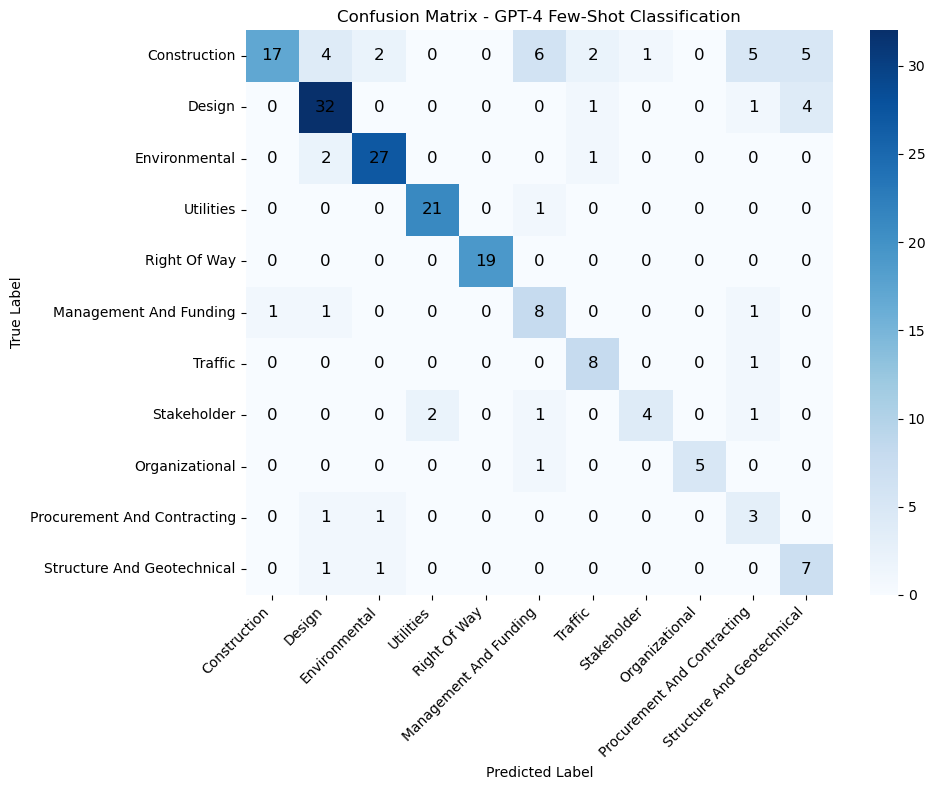

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Normalize predictions before confusion matrix
preds = [p.strip().title() for p in preds]

# Create and format the confusion matrix
cm = confusion_matrix(y_test, preds, labels=level1_categories)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=level1_categories,
    yticklabels=level1_categories,
    annot_kws={"size": 12, "color": "black"}  # improved visibility
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - GPT-4 Few-Shot Classification")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [17]:
cm = confusion_matrix(y_test, preds, labels=level1_categories)
cm

array([[17,  4,  2,  0,  0,  6,  2,  1,  0,  5,  5],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  0,  1,  4],
       [ 0,  2, 27,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 21,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  8,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  8,  0,  0,  1,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  4,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  5,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  7]])

In [18]:
# 📦 Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from openai import OpenAI

# 🔑 Set your GPT-4 API Key
client = OpenAI(api_key="**"
)  # ← Replace with your actual key

# 📥 Load & Clean the Dataset
df = pd.read_excel("Risk_Database1.xlsx")
df = df.dropna(subset=['risk_name', 'Level1'])

df['risk_name'] = df['risk_name'].str.strip().str.lower()
df['Level1'] = df['Level1'].str.strip().str.title()

# 🎯 Optional: Encode Labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Level1_encoded'] = le.fit_transform(df['Level1'])

# 🔀 Split Data for Testing
X_train, X_test, y_train, y_test = train_test_split(
    df['risk_name'], df['Level1'], test_size=0.2, random_state=42, stratify=df['Level1']
)

# 📋 Define Fixed List of Categories
level1_categories = [
    "Construction", "Design", "Environmental", "Utilities", "Right Of Way",
    "Management And Funding", "Traffic", "Stakeholder", "Organizational",
    "Procurement And Contracting", "Structure And Geotechnical"
]


# ✏️ Build Instruction-Based Prompt
def build_prompt(risk_name):
    prompt = f"""
You are a construction risk classification assistant. Your task is to classify unstructured risk descriptions into one of the following high-level risk categories:

- Construction
- Design
- Environmental
- Utilities
- Right Of Way
- Management And Funding
- Traffic
- Stakeholder
- Organizational
- Procurement And Contracting
- Structure And Geotechnical

Classify the following risk statement into the most appropriate category from the list above. Return only the category name.

Risk Statement: {risk_name}

Your Answer:
"""
    return prompt.strip()

# 🤖 Classify Risk with GPT-4
def classify_risk_gpt4(risk_name):
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": build_prompt(risk_name)}],
            temperature=0,
            max_tokens=20,
        )
        return response.choices[0].message.content.strip().title()
    except Exception as e:
        print(f"Error: {e}")
        return "Unknown"

# 🧪 Run Predictions on Test Set (with progress bar)
preds = [classify_risk_gpt4(rn) for rn in tqdm(X_test.tolist())]

# 📊 Evaluate Model
print("\n--- GPT-4 Zero-Shot Performance ---")
print(classification_report(y_test, preds, labels=level1_categories))


100%|█████████████████████████████████████████| 200/200 [02:31<00:00,  1.32it/s]


--- GPT-4 Zero-Shot Performance ---
                             precision    recall  f1-score   support

               Construction       0.76      0.52      0.62        42
                     Design       0.82      0.87      0.85        38
              Environmental       0.93      0.93      0.93        30
                  Utilities       0.96      1.00      0.98        22
               Right Of Way       1.00      1.00      1.00        20
     Management And Funding       0.44      0.73      0.55        11
                    Traffic       0.80      0.89      0.84         9
                Stakeholder       0.83      0.62      0.71         8
             Organizational       0.67      0.33      0.44         6
Procurement And Contracting       0.30      0.60      0.40         5
 Structure And Geotechnical       0.64      0.78      0.70         9

                   accuracy                           0.79       200
                  macro avg       0.74      0.75      0.73      

In [19]:
# 📦 Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from openai import OpenAI

# 🔑 Set your GPT-4 API Key
client = OpenAI(api_key="**"
)  # ← Replace with your actual key

# 📥 Load & Clean the Dataset
df = pd.read_excel("Risk_Database1.xlsx")
df = df.dropna(subset=['risk_name', 'Level1'])

df['risk_name'] = df['risk_name'].str.strip().str.lower()
df['Level1'] = df['Level1'].str.strip().str.title()

# 🎯 Optional: Encode Labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Level1_encoded'] = le.fit_transform(df['Level1'])

# 🔀 Split Data for Testing
X_train, X_test, y_train, y_test = train_test_split(
    df['risk_name'], df['Level1'], test_size=0.2, random_state=42, stratify=df['Level1']
)

# 📋 Define Fixed List of Categories
level1_categories = [
    "Construction", "Design", "Environmental", "Utilities", "Right Of Way",
    "Management And Funding", "Traffic", "Stakeholder", "Organizational",
    "Procurement And Contracting", "Structure And Geotechnical"
]


# ✏️ Build Instruction-Based Prompt
def build_prompt(risk_name):
    prompt = f"""
You are a construction risk classification expert.

Your task is to assign the following unstructured risk statement to the most appropriate high-level risk category, based on the definitions below:

- **Construction**: Issues related to construction access, safety, materials, subcontractor performance, buried objects, construction methods, or weather-related impacts.
- **Design**: Problems involving design changes, delays, incompleteness, exceptions, or aesthetic concerns.
- **Environmental**: Risks related to permitting, NEPA process, endangered species, hazardous materials, water/air quality, or archaeological constraints.
- **Utilities**: Issues with utility coordination, conflicts, requirements, relocation, or funding gaps.
- **Right Of Way**: Challenges acquiring or relocating right of way, railroad access, or right-of-way planning.
- **Management And Funding**: Delays in decisions, scope changes, cash flow problems, economic conditions, labor disruptions, or force majeure.
- **Traffic**: Risks involving traffic growth, tolling, mobility impacts, land use, or pedestrian/bicycle access.
- **Stakeholder**: Public opposition, stakeholder changes, late requests, or communication breakdowns with external parties.
- **Organizational**: Internal changes in leadership, policy, resources, or organizational priorities.
- **Procurement And Contracting**: Delays or disputes related to procurement methods, contract terms, or change orders.
- **Structure And Geotechnical**: Issues involving excavation, soil/geotech conditions, structural vibration, or foundation design.

Classify the following risk statement into the most appropriate category from the list above. Return **only the category name**.

Risk Statement: "{risk_name}"

Your Answer:
"""
    return prompt.strip()
    
# 🤖 Classify Risk with GPT-4
def classify_risk_gpt4(risk_name):
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": build_prompt(risk_name)}],
            temperature=0,
            max_tokens=20,
        )
        return response.choices[0].message.content.strip().title()
    except Exception as e:
        print(f"Error: {e}")
        return "Unknown"

# 🧪 Run Predictions on Test Set (with progress bar)
preds = [classify_risk_gpt4(rn) for rn in tqdm(X_test.tolist())]

# 📊 Evaluate Model
print("\n--- GPT-4 Zero-Shot Performance ---")
print(classification_report(y_test, preds, labels=level1_categories))


100%|█████████████████████████████████████████| 200/200 [02:17<00:00,  1.45it/s]


--- GPT-4 Zero-Shot Performance ---
                             precision    recall  f1-score   support

               Construction       0.78      0.60      0.68        42
                     Design       0.81      0.92      0.86        38
              Environmental       0.96      0.80      0.87        30
                  Utilities       0.92      1.00      0.96        22
               Right Of Way       0.95      0.95      0.95        20
     Management And Funding       0.59      0.91      0.71        11
                    Traffic       0.80      0.89      0.84         9
                Stakeholder       1.00      0.62      0.77         8
             Organizational       1.00      0.83      0.91         6
Procurement And Contracting       0.43      0.60      0.50         5
 Structure And Geotechnical       0.67      0.89      0.76         9

                   accuracy                           0.82       200
                  macro avg       0.81      0.82      0.80      

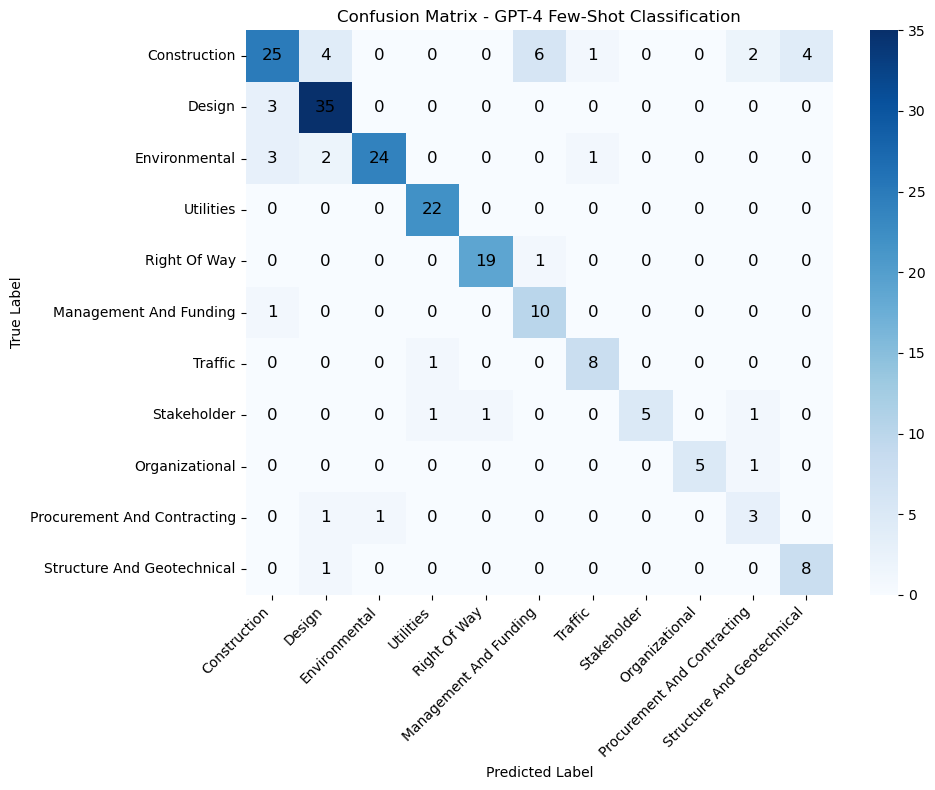

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Normalize predictions before confusion matrix
preds = [p.strip().title() for p in preds]

# Create and format the confusion matrix
cm = confusion_matrix(y_test, preds, labels=level1_categories)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=level1_categories,
    yticklabels=level1_categories,
    annot_kws={"size": 12, "color": "black"}  # improved visibility
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - GPT-4 Few-Shot Classification")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [24]:
# 📦 Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from openai import OpenAI

# 🔑 Set your GPT-4 API Key
client = OpenAI(api_key="**"
)  # ← Replace with your actual key

# 📥 Load & Clean the Dataset
df = pd.read_excel("Risk_Database1.xlsx")
df = df.dropna(subset=['risk_name', 'Level1'])

df['risk_name'] = df['risk_name'].str.strip().str.lower()
df['Level1'] = df['Level1'].str.strip().str.title()

# 🎯 Encode Labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Level1_encoded'] = le.fit_transform(df['Level1'])

# 🔀 Split for Testing
X_train, X_test, y_train, y_test = train_test_split(
    df['risk_name'], df['Level1'], test_size=0.2, random_state=42, stratify=df['Level1']
)

# 📋 Fixed Level 1 Categories
level1_categories = [
    "Construction", "Design", "Environmental", "Utilities", "Right Of Way",
    "Management And Funding", "Traffic", "Stakeholder", "Organizational",
    "Procurement And Contracting", "Structure And Geotechnical"
]

# ✏️ Few-Shot Prompt Template
def build_few_shot_prompt(risk_name):
    prompt = f"""
You are a risk management expert. Given the name of a construction project risk, assign it to the most appropriate high-level category. Use the following examples to guide your reasoning:

Examples:

Risk Name: "developer schedule exposes owner to risk of unsubstantiated schedule delays"
Category: Construction

Risk Name: "cost savings opportunity for redecking bridges"
Category: Design

Risk Name: "additional sound walls required due to new development"
Category: Environmental

Risk Name: "damage to unknown utilities during construction"
Category: Utilities

Risk Name: "delay in right of way document internal approval process"
Category: Right Of Way

Risk Name: "labor strike"
Category: Management And Funding

Risk Name: "coordination issues between DB and tolling contractors"
Category: Traffic

Risk Name: "timely railroad collaboration (railroad undertaking own construction scope)"
Category: Stakeholder

Risk Name: "ongoing involvement of owner staff"
Category: Organizational

Risk Name: "management experience with alternative procurement delivery"
Category: Procurement And Contracting

Risk Name: "rock excavation"
Category: Structure And Geotechnical

Now, classify the following risk:

Risk Name: "{risk_name}"
Category:"""
    return prompt.strip()

# 🤖 GPT-4 Classification with Few-Shot Prompting
def classify_risk_gpt4_few_shot(risk_name):
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": build_few_shot_prompt(risk_name)}],
            temperature=0,
            max_tokens=20,
        )
        return response.choices[0].message.content.strip().title()
    except Exception as e:
        print(f"Error: {e}")
        return "Unknown"

# 🔁 Classify All Test Entries
preds = [classify_risk_gpt4_few_shot(rn) for rn in tqdm(X_test.tolist())]

# 📊 Evaluate Results
print("\n--- GPT-4 Few-Shot Performance ---")
print(classification_report(y_test, preds, labels=level1_categories))


100%|█████████████████████████████████████████| 200/200 [02:32<00:00,  1.31it/s]


--- GPT-4 Few-Shot Performance ---
                             precision    recall  f1-score   support

               Construction       0.91      0.50      0.65        42
                     Design       0.81      0.92      0.86        38
              Environmental       0.94      0.97      0.95        30
                  Utilities       1.00      0.95      0.98        22
               Right Of Way       1.00      0.95      0.97        20
     Management And Funding       0.54      0.64      0.58        11
                    Traffic       0.75      1.00      0.86         9
                Stakeholder       0.88      0.88      0.88         8
             Organizational       1.00      0.50      0.67         6
Procurement And Contracting       0.27      0.60      0.38         5
 Structure And Geotechnical       0.56      1.00      0.72         9

                   accuracy                           0.81       200
                  macro avg       0.79      0.81      0.77       